In [3]:
import numpy as np

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
df=pd.read_csv('diabetes.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Analysis

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

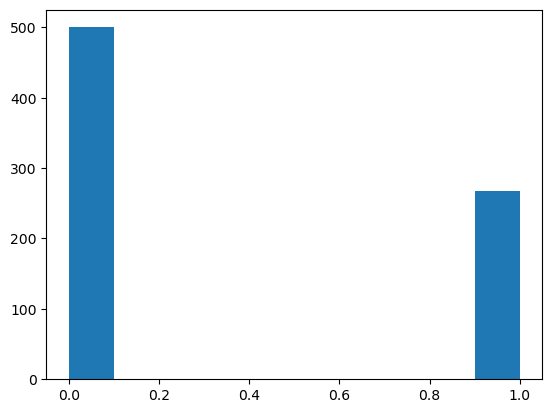

In [11]:
plt.hist(df['Outcome'])

In [13]:
labels=['Positive','Negative']

In [17]:
positive=0
negative=0
for i in df['Outcome']:
    if i==1:
        positive=positive+1
negative=df['Outcome'].count()- positive

In [19]:

#df['Outcome'].count().where(df['Outcome']==1)
negative=(df['Outcome']==0).sum()
positive=(df['Outcome']==1).sum()

In [21]:
result=[positive,negative]

([<matplotlib.patches.Wedge at 0x143e478d0>,
 [Text(0.5025942326565439, 0.9784676986494649, 'Positive'),
  Text(-0.5025941410457839, -0.9784677457057288, 'Negative')],
 [Text(0.2741423087217512, 0.533709653808799, '34.9%'),
  Text(-0.27414225875224574, -0.533709679475852, '65.1%')])

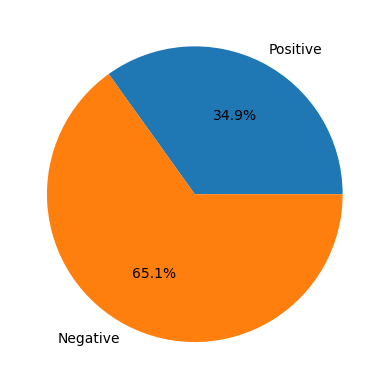

In [23]:
fig, ax = plt.subplots()
ax.pie(result, labels=labels,autopct='%1.1f%%')

## Statistical Analysis

In [57]:
corr = df.corr(method = 'pearson')
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [44]:
import seaborn as sns

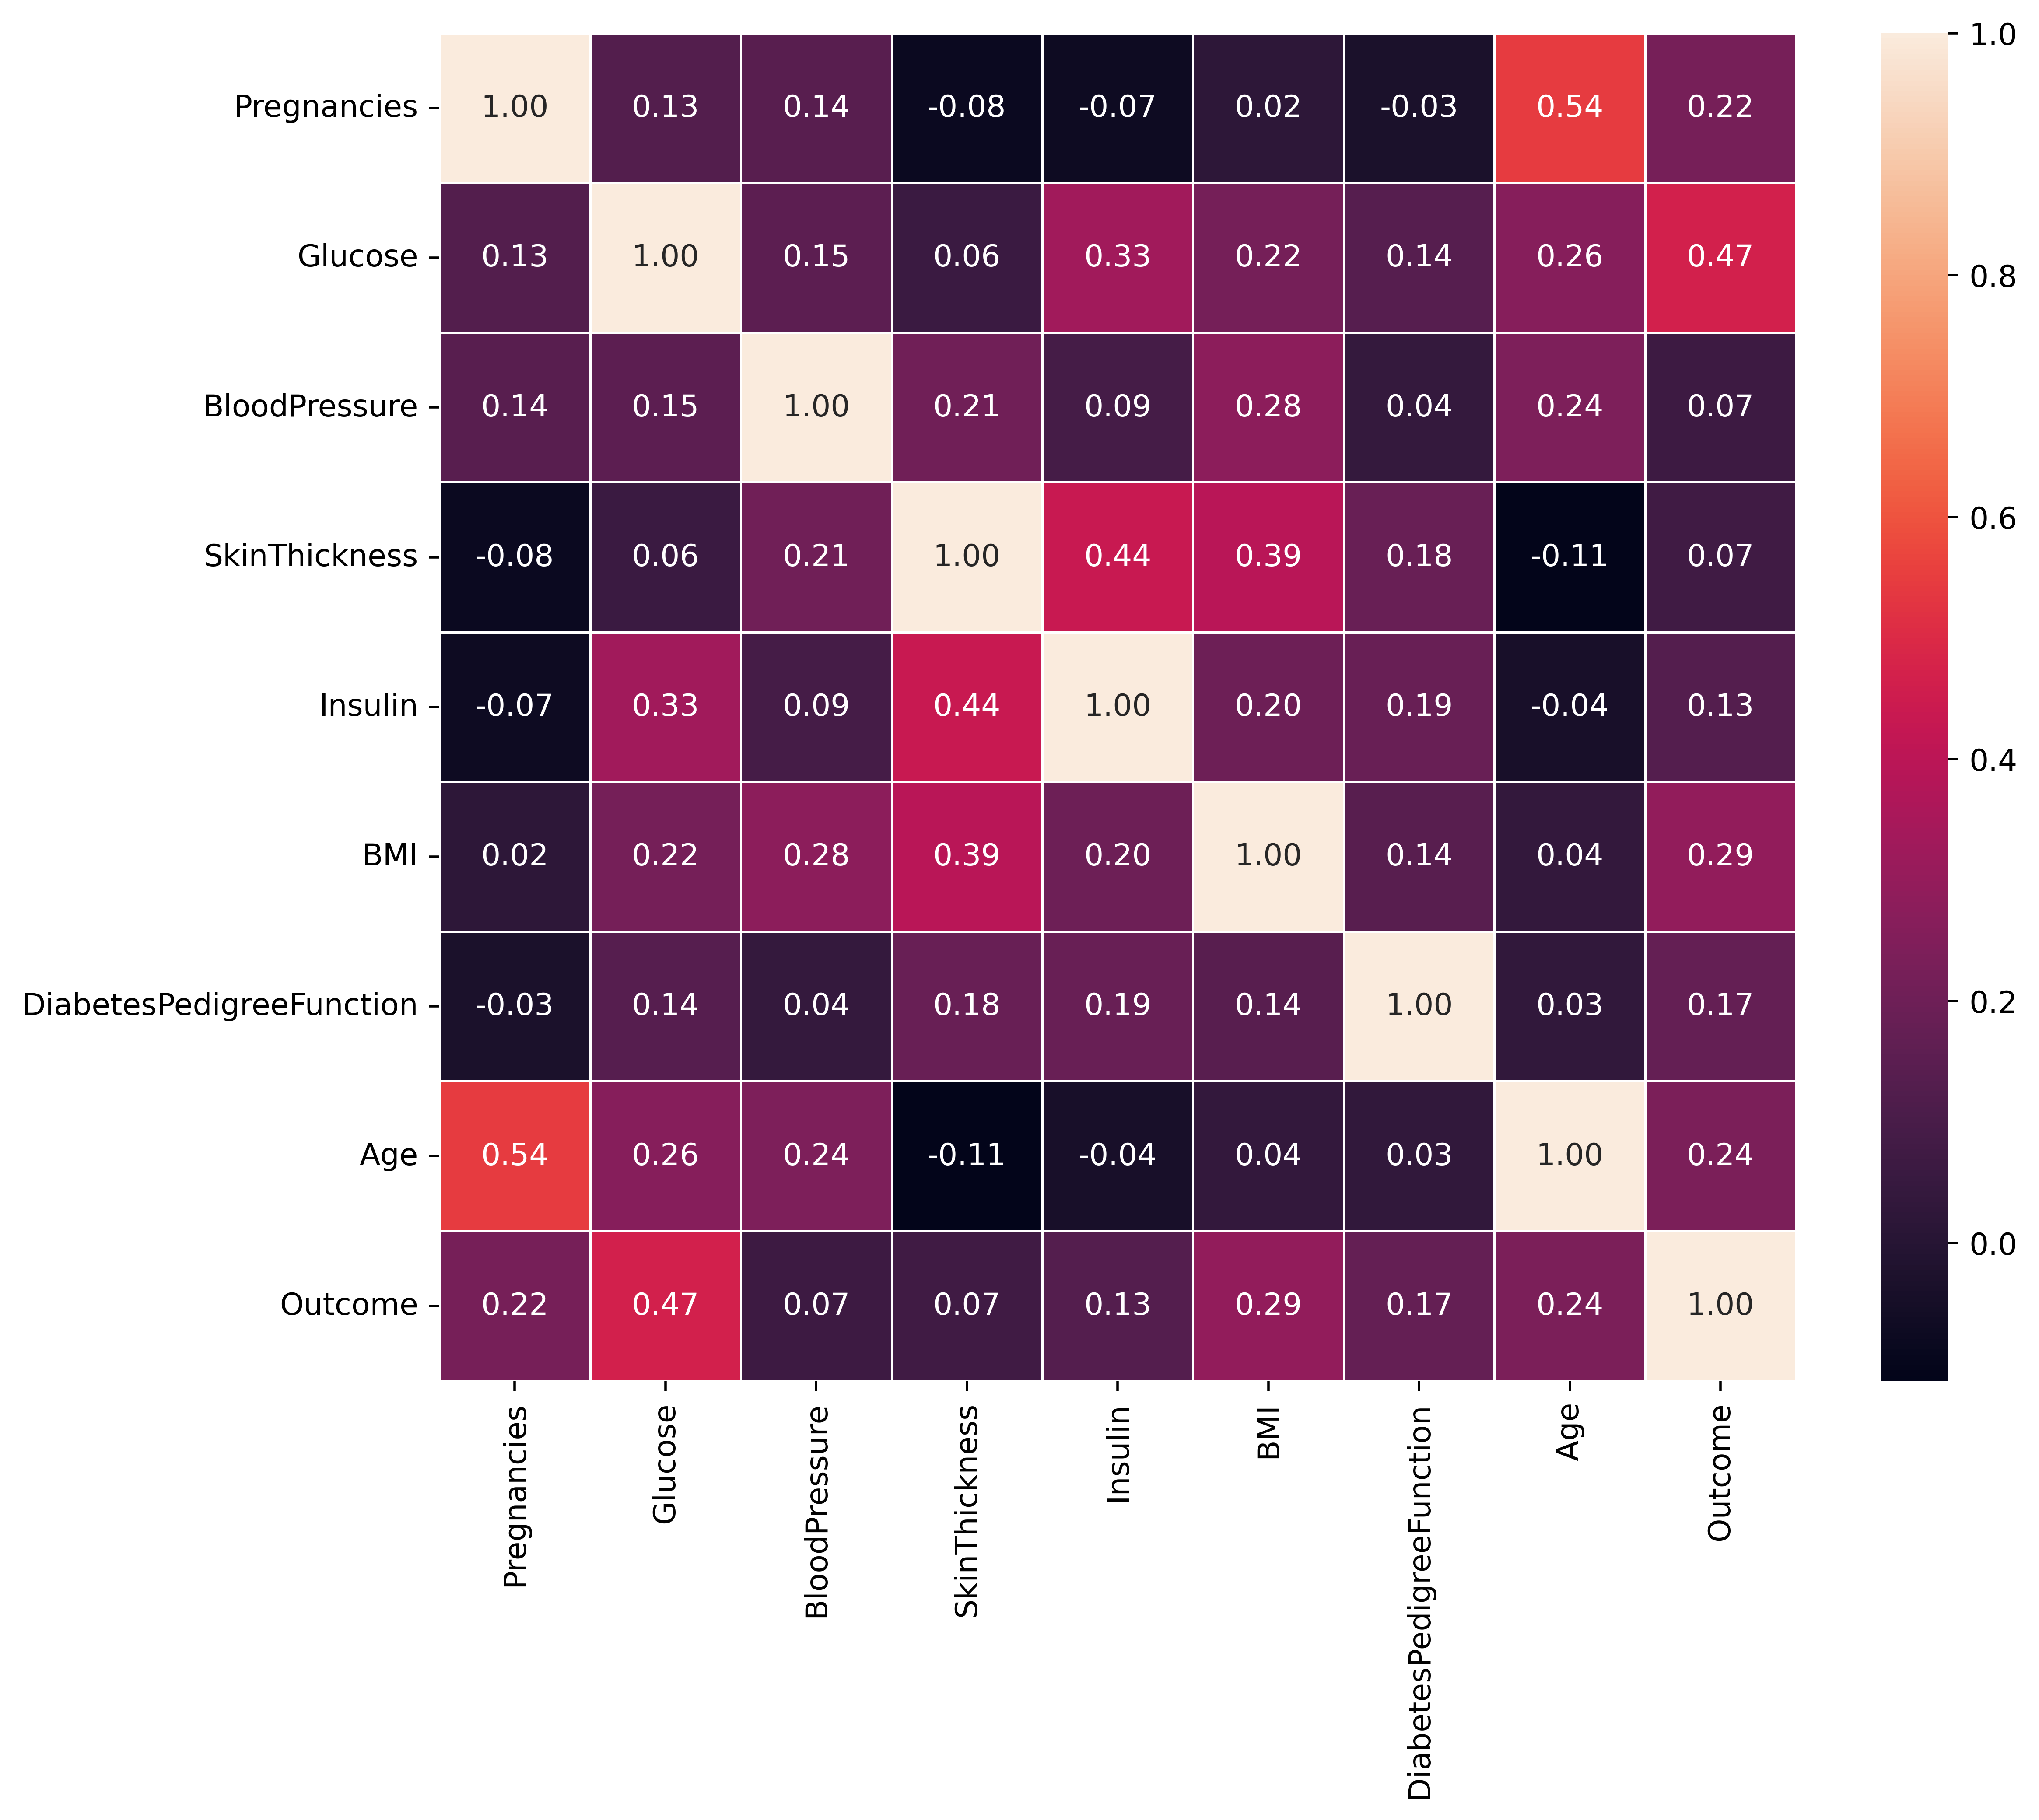

In [59]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

## Logistic regression

In [106]:
Y=df['Outcome']


In [110]:
X= df.drop(['Outcome'],axis=1)

In [112]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [126]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [128]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

[Text(0.6148603723404256, 0.9615384615384616, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.3228058510638298, 0.8846153846153846, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.17952127659574468, 0.8076923076923077, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.1196808510638298, 0.7307692307692307, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.10904255319148937, 0.6538461538461539, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.09840425531914894, 0.5769230769230769, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.0425531914893617, 0.5, 'x[4] <= 156.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.02127659574468085, 0.4230769230769231, 'x[3] <= 41.0\ngini = 0.019\nsamples = 104\nvalue = [103, 1]'),
 Text(0.010638297872340425, 0.34615384615384615, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.031914893617021274

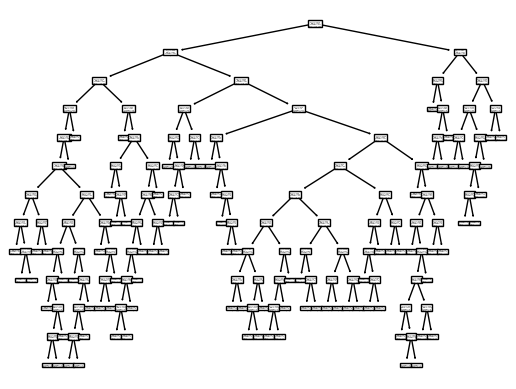

In [133]:
tree.plot_tree(clf)

In [139]:
prediction=clf.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy=accuracy_score(Y_test, prediction)

In [151]:
accuracy

0.6929133858267716